In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
from datetime import datetime
from scipy.interpolate import LinearNDInterpolator,NearestNDInterpolator,CubicHermiteSpline,CloughTocher2DInterpolator,griddata

In [2]:
df = pd.read_csv('temperature_schwartau_edit.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

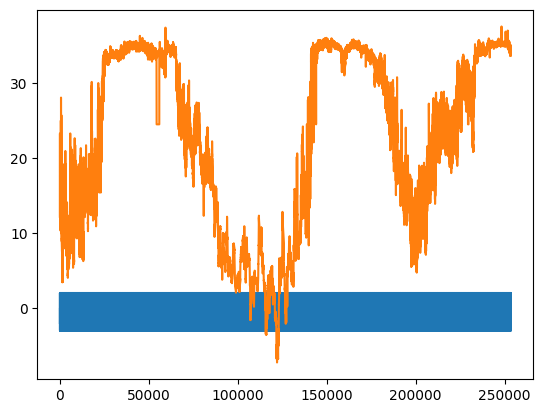

In [3]:
first_time = df['timestamp'].min()
last_time = df['timestamp'].max()

timestamps = df['timestamp'].values.astype(int) // 10**9 
temperatures = df['temperature'].values

X = np.linspace(timestamps.min(), timestamps.max(), num=30)
Y = np.linspace(min(temperatures), max(temperatures), num=30)
z = np.meshgrid(X, Y)

data_points = np.column_stack((timestamps, temperatures))

plt.plot(data_points)

## Interpolation methods

#### Linear Interpolation

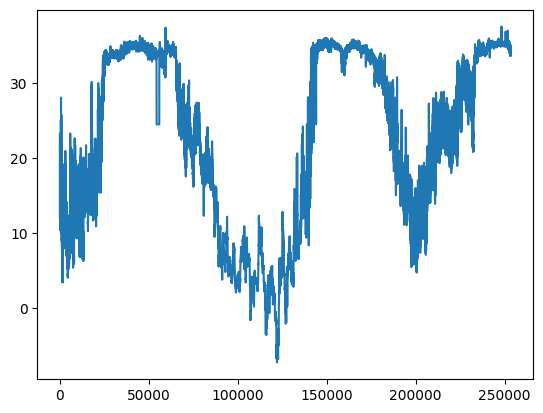

In [4]:
linear_interpol = LinearNDInterpolator(data_points, temperatures)
plt.plot(linear_interpol)

#### Nearest Interpolation

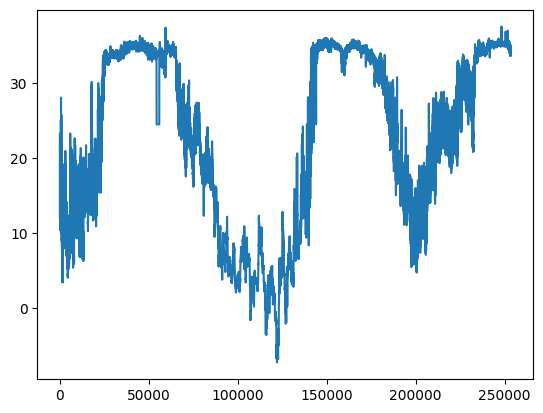

In [5]:
nearest_interpol = NearestNDInterpolator(data_points,temperatures)
plt.plot(nearest_interpol)



#### Cubic Interpolation

In [6]:
global years, months, days, hours, sensor_numbers,dataset  # Declare the variables as global
dataset = pd.read_csv("sensor_data_hours_updated.csv")
years = set(dataset["Year"])
months = set(dataset["Month"])
days = set(dataset["Day"])
hours = set(dataset["Hour"])
sensor_numbers = set(dataset["Sensor_number"])


month_list = list(months)
    

datetime_objects = [datetime(year, month, day, hour) for year, month, day, hour in zip(years, months, days, hours)]
date_strings = [datetime(year, month, day, hour).strftime("%Y-%m-%d %H:%M:%S") for year, month, day, hour in zip(dataset["Year"], dataset["Month"], dataset["Day"], dataset["Hour"])]

unique_date_strings = set(date_strings)
unique_date_strings_list = list(unique_date_strings)

def custom_key(date_string):
    dt = datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")
    return dt.strftime("%Y-%m-%d %H:%M:%S")

dates = sorted(unique_date_strings_list, key=custom_key)
first_timestamp = '2020-01-01 00:00:00'
recording = dataset[dataset['Timestamp'] == first_timestamp]

X = np.linspace(recording['X'].min(), recording['X'].max(), 50)
Y = np.linspace(recording['Y'].min(), recording['Y'].max(), 50)
Z = np.linspace(recording['Z'].min(), recording['Z'].max(), 20)

x, y, z = np.meshgrid(X, Y, Z)

points = np.array((recording['X'], recording['Y'], recording['Z'])).T
temps = recording['Temperature']

newdata = griddata(points, temps, (x, y, z), method='linear')

print(newdata)

[[[        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  ...
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]]

 [[        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  ...
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
      

### Graph

ValueError: cannot reshape array of size 50000 into shape (1,20)

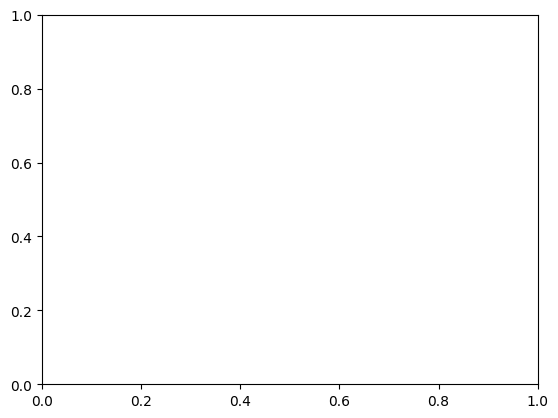

In [7]:
plt.pcolormesh(x, y, z, shading='auto')
plt.plot(x, y, "ok", label="input point")
plt.legend()
plt.colorbar()
plt.axis("equal")
plt.show()